In [18]:
# Importing necessary modules 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np 
import sys
print("Python: {}".format(sys.version))

Python: 3.9.5 (tags/v3.9.5:0a7dcbd, May  3 2021, 17:27:52) [MSC v.1928 64 bit (AMD64)]


In [2]:
# Import games data 
df = pd.read_csv("games.csv")
df.head 

<bound method NDFrame.head of            id                type  \
0       12333           boardgame   
1      120677           boardgame   
2      102794           boardgame   
3       25613           boardgame   
4        3076           boardgame   
...       ...                 ...   
81307  184441  boardgameexpansion   
81308  184442           boardgame   
81309  184443           boardgame   
81310  184449           boardgame   
81311  184451           boardgame   

                                                    name  yearpublished  \
0                                      Twilight Struggle         2005.0   
1                                          Terra Mystica         2012.0   
2                              Caverna: The Cave Farmers         2013.0   
3              Through the Ages: A Story of Civilization         2006.0   
4                                            Puerto Rico         2002.0   
...                                                  ...            ...   


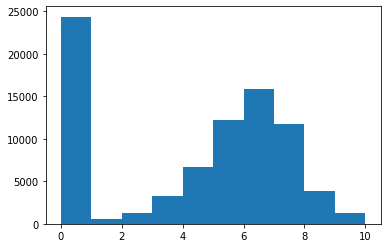

In [3]:
# See distrbution of average_rating 
plt.hist(df["average_rating"])
plt.show()
# We see that many games are having 0 ratings 

In [4]:
# Check first game which has 0 average rating 

print(df.loc[df["average_rating"] == 0].iloc[0])

# Check first game which has positive rating 

print(df.loc[df["average_rating"] > 0].iloc[0])

# We noticed that games with less informations have 0 average_rating 

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                  0.0
minplayers                     0.0
maxplayers                     0.0
playingtime                    0.0
minplaytime                    0.0
maxplaytime                    0.0
minage                         0.0
users_rated                      0
average_rating                 0.0
bayes_average_rating           0.0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                 0.0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                      2005.0
minplayers                            2.0
maxplayers                            2.0
playingtime          

In [5]:
# Check Which rows have missing datas
cnt = 0
for i in range(len(df)):
    for j in df.iloc[i]:
        if j=='?' or j==None:
            print(i)
            cnt+=1
print(cnt)


35085
1


<ipython-input-6-6d24e5796cae>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(0, inplace = True)


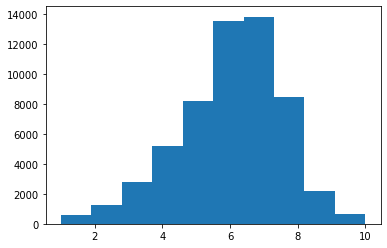

In [6]:
# Filter games which have no rating (Decided by average_rating distribution)
df = df[df["average_rating"] > 0]

# Remove rows with missing values ( As only 1 row has missing data)
df.dropna(0, inplace = True)

plt.hist(df["average_rating"])
plt.show()

In [7]:
# Looking at columns 
print(df.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


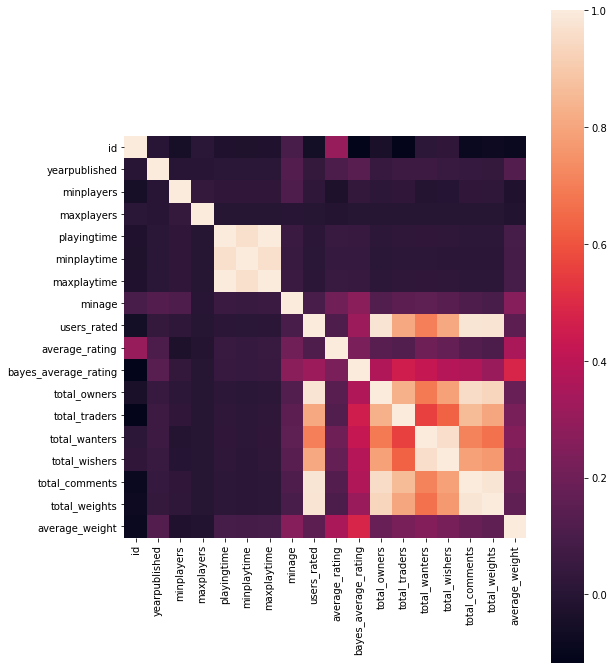

In [8]:
# Correlation matrix to see which features are directly correlated, so we may remove them, or draw some other conclusions 
corrmat = df.corr()
fig = plt.figure(figsize = (9,12))
sns.heatmap(corrmat, square = True)
plt.show()

In [9]:
columns = df.columns.tolist()

# Filter the data we don't want
# As minplaytime, maxplaytime are highly correlated with playingtime, we can remove them
columns = [c for c in columns if c not in ["bayes_average_rating", "average_rating", "type", "name", "id", "minplaytime", "maxplaytime"]]

# Store the class we'll be predicting on
target = "average_rating"

In [10]:
# Generate training and testing data 
X = df[columns]
Y = df[target]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split(X, Y) 

In [11]:
# Train on Linear regression model 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [12]:
# Predict on Linear regression
predictions = LR.predict(X_test)

print(mean_squared_error(predictions, y_test))

2.0853064346710513


In [29]:
# Train on Random Forest regression model 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=6)
for leaf in range(2,15):
    RFR = RandomForestRegressor(n_estimators = 90, min_samples_leaf=leaf)
    cv_result = cross_val_score(RFR, X_train, y_train, cv=kfold)
    print(cv_result.mean(), cv_result.std() ,leaf)


0.41249954240113773 0.014266544699303092 2
0.4143981834927497 0.013744797072991697 3
0.4165464243554429 0.01404480639201811 4
0.4171526406416905 0.01321409336065364 5
0.41719916968917814 0.013619157051659536 6
0.4161916545688846 0.01404625717557357 7
0.41601516042939757 0.014450925666500096 8
0.4156933668332068 0.013949530088840987 9
0.4153552659436837 0.014351420406790901 10
0.4142804956474662 0.014599012883271244 11
0.41415374134466937 0.013801669403203397 12
0.4131652962435395 0.014205324582847331 13
0.4119868327026402 0.01434873138958824 14


In [14]:
# We observe that min_sample_leaf = 12, gave best result, (low bias, low variance) hence training our model with best hyper_parameters 
RFR = RandomForestRegressor(n_estimators = 100, min_samples_leaf=12)
RFR.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=12)

In [15]:
# Predict on Random Forest regressor
predictions = RFR.predict(X_test)

print(mean_squared_error(predictions, y_test))

1.4564448922504616


In [16]:
# As Random Forest Regressor model has better performance over Linear regression model therefore we will use RFR model
# for predictions in our website. 
# Storing model in the file 
import pickle

pickle.dump(RFR, open('./../../backend/script/RFR.pkl','wb'))


In [19]:
# Verifying if model can be extracted properly 
loaded_model = pickle.load(open('./../../backend/script/RFR.pkl','rb'))
ex = np.array([ X_test.iloc[0][i] for i in range(len(X_test.iloc[0])) ])
ex.resize(1,13)
print("Predicted Value: {}".format(np.squeeze(loaded_model.predict(ex))))
print("Actual Value: {}".format(y_test.iloc[0]))


Predicted Value: 6.867816196216382
Actual Value: 6.8955
